# Livrable 1 - classification d'images

# Introduction
Voici notre démarche pour mettre en place un model de classification :

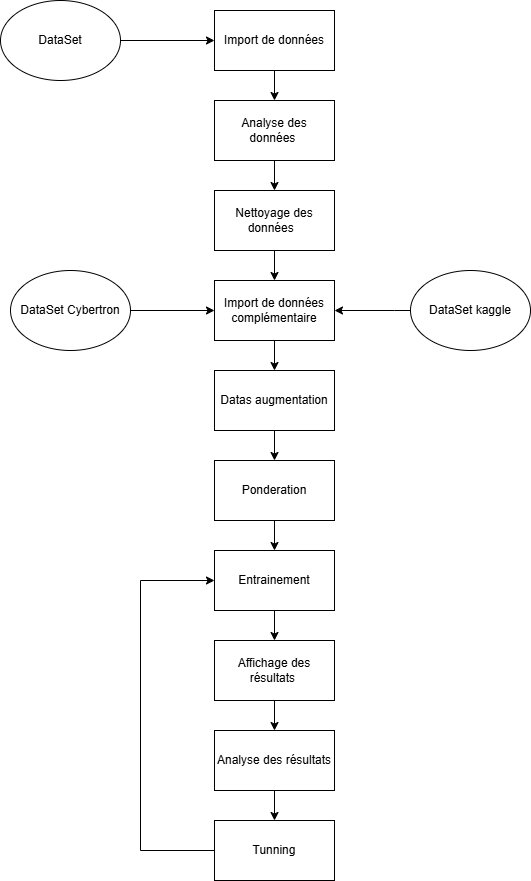

# Dépendances
Les dépandances nécessaires à la bonne exécution du code.

In [ ]:
#Import des dépendances
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from collections import defaultdict
import shutil
import random
import kaggle
import requests
from zipfile import ZipFile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

# Initialisation

In [ ]:
#Téléchargement et extraction du dataset
dataset_zip_path = 'dataset.zip'
def extract_dataset(zip_path, extract_to):
    """
    Extrait les fichiers d'un dataset zippé.

    Args:
        zip_path (str): Chemin vers le fichier zip.
        extract_to (str): Dossier où extraire les fichiers.
    """
    if not os.path.exists(zip_path):
        raise FileNotFoundError(f"Le fichier {zip_path} n'existe pas.")
    
    os.makedirs(extract_to, exist_ok=True)
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Dataset extrait dans le dossier : {extract_to}")

# Appel de la fonction pour extraire le dataset
# extract_dataset(dataset_zip_path, './Dataset')


# Analyse du dataset
Dans cette partie, nous allons analyser le dataset afin d'identifier les actions nécessaires à son utilisation pour entraîner notre IA.

## Informations sur le dataset
Nous parcourons le dataset pour récupérer les différentes classes ainsi que le nombre de données (images) par classe.

Nous affichons ensuite un histogramme pour une meilleure visualisation.

In [ ]:
# Chemin vers le dataset
dataset_path = "./Dataset/Dataset1" # Chemin vers le dataset

# Récupération des classes et du nombre d'images par classe
classes = []
image_counts = []
image_in_Sketch=0

In [ ]:
def get_infos_datas(dataset_path):
    # Vérification de l'existence du dossier
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Le dossier {dataset_path} n'existe pas.")

    # Récupération des classes et du nombre d'images par classe
    classes = []
    image_counts = []

    # Parcours des fichiers dans le dataset
    for class_name in os.listdir(dataset_path):  # Parcours des fichiers dans le dataset
        class_path = os.path.join(dataset_path, class_name)  # Chemin vers le fichier
        classes.append(class_name.replace('Dataset Livrable 1 - ',''))  # Ajout du nom de la classe sans l'extension
        image_counts.append(len(os.listdir(class_path)))  # Comptage des fichiers dans le dossier

    # Affichage des classes et du nombre d'images par classe
    print("Classes : ", classes)
    print("Nombre d'images par classe : ", image_counts)

    # Affichage de l'histogramme
    plt.figure(figsize=(10, 6))
    plt.bar(classes, image_counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'images')
    plt.title('Répartition du nombre de données (images) par classe')
    plt.xticks(rotation=45)
    plt.show()
    return classes, image_counts

In [ ]:
classes, image_counts = get_infos_datas(dataset_path) # Appel de la fonction pour récupérer les infos du dataset
image_in_Sketch = image_counts[3] # Nombre d'images dans la classe Sketch

## Afficher des images
Fonction pour afficher une image aléatoire par classe.

In [ ]:
def display_random_images(dataset_path):
    """
    Affiche un nombre aléatoire d'images d'une classe donnée.
    
    :param dataset_path: Chemin vers le dataset
    :param num_images: Nombre d'images à afficher (par défaut 5)
    """
    fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
    for idx, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        images = os.listdir(class_path)
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)
        img = PIL.Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(class_name)
        axes[idx].axis("off")
    plt.tight_layout()
    plt.show()

import os
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

def display_random_images_with_predictions(dataset_path, model, class_to_index, image_size=(224, 224), num_images=5):
    """
    Affiche des images aléatoires du dataset avec la classe réelle et la prédiction du modèle.
    
    :param dataset_path: Chemin vers le dataset
    :param model: Le modèle entraîné
    :param class_to_index: Dictionnaire des classes vers index
    :param image_size: Taille cible de l'image pour le modèle
    :param num_images: Nombre d'images à afficher
    """
    # Inverser le dictionnaire pour index -> classe
    index_to_class = {v: k for k, v in class_to_index.items()}
    
    # Lister toutes les images du dataset avec leurs classes réelles
    all_images = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                all_images.append((os.path.join(class_path, image_name), class_name))
    
    # Choisir aléatoirement les images
    random_images = random.sample(all_images, num_images)

    # Affichage
    fig, axes = plt.subplots(1, num_images, figsize=(4 * num_images, 5))

    for idx, (img_path, real_class) in enumerate(random_images):
        # Charger et prétraiter l'image
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Prédiction
        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction[0])
        predicted_class = index_to_class[predicted_index]

        # Affichage
        axes[idx].imshow(Image.open(img_path))
        axes[idx].axis("off")
        axes[idx].set_title(f"Réel: {real_class}\nPrédit: {predicted_class}", fontsize=10)

    plt.tight_layout()
    plt.show()

In [ ]:
display_random_images(dataset_path)  # Affichage de 5 images aléatoires d'une classe donnée

## Nettoyage des données
La fonction suivante permet de parcourir le dataset et de supprimer les fichiers non images et les images corrompus.

In [ ]:
# Suppresion des fichiers corrompus ou non images --------------------------------------------------------------------
def clean_images_dataset(dataset_path_arg):
    """
    Fonction pour nettoyer le dataset en supprimant les fichiers corrompus ou non images.
    """
    # Dictionnaire pour stocker le nombre d'images corrompues par classe
    corrupted_count_by_class = defaultdict(int)
    dataset_path = dataset_path_arg
    print("Début de la vérification des images ...")

    # Récupération de toutes les images pour calculer la progression
    all_files = []
    for dir_name in os.listdir(dataset_path): 
        dir_path = os.path.join(dataset_path, dir_name)
        for file_name in os.listdir(dir_path):
            all_files.append((dir_name, dir_path, file_name))

    total_files = len(all_files)
    checked_files = 0  # Pour la progression

    # Parcours des images avec affichage de la progression
    for dir_name, dir_path, file_name in all_files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                with open(os.path.join(dir_path, file_name), 'rb') as file:
                    img_bytes = file.read()  # Lire les bytes de l'image
                    img = tf.image.decode_image(img_bytes)  # Essayer de décoder l'image
            except Exception as e:
                corrupted_count_by_class[dir_name] += 1
                print(f"\nImage corrompue : {file_name} dans {dir_name}. Exception: {e}")
                os.remove(os.path.join(dir_path, file_name))
                print(f"Image {file_name} supprimée.")
        else:
            corrupted_count_by_class[dir_name] += 1
            print(f"\nLe fichier {file_name} dans {dir_name} n'est pas une image.")
            os.remove(os.path.join(dir_path, file_name))
            print(f"Fichier {file_name} supprimé.")

        # Mise à jour de la progression
        checked_files += 1
        progress = (checked_files / total_files) * 100
        print(f"\rProgression : [{int(progress)}%] {checked_files}/{total_files} images vérifiées", end="")

    print("\nVérification des fichiers terminée.")

    # Affichage du nombre d'images corrompues par dossier
    for dir_name, count in corrupted_count_by_class.items():
        print(f"Dossier {dir_name} : {count} images corrompues")

    # Nombre total d'images corrompues
    total_corrupted = sum(corrupted_count_by_class.values())
    print(f"Nombre total d'images corrompues ou non image : {total_corrupted}")


In [ ]:
clean_images_dataset(dataset_path)

Fonction pour séparer les images jpg et png d'un dossier.

In [ ]:
def separate_images(source_folder):
    # Définition des dossiers de destination
    jpg_folder = source_folder + "_jpg"
    png_folder = source_folder + "_png"
    
    # Création des dossiers s'ils n'existent pas
    os.makedirs(jpg_folder, exist_ok=True)
    os.makedirs(png_folder, exist_ok=True)
    
    # Parcours des fichiers dans le dossier source
    for filename in os.listdir(source_folder):
        file_path = os.path.join(source_folder, filename)
        
        # Vérification que c'est bien un fichier
        if os.path.isfile(file_path):
            if filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg"):
                shutil.move(file_path, os.path.join(jpg_folder, filename))
            elif filename.lower().endswith(".png"):
                shutil.move(file_path, os.path.join(png_folder, filename))
    
    print("Séparation terminée !")

In [ ]:
# separate_images("./Dataset/Dataset1/Sketch/")

## Amélioration du dataset
Grâce à notre exploration des données précédentes, nous avons remarqué que l'une de nos classes (Sketch) possède un nombre de données bien inférieur aux autres classes.

Pour y remédier, plusieurs solutions sont envisageables :
- Augmenter la taille du dataset en ajoutant de nouvelles données provenant d'autres datasets.
- Générer de nouvelles données en appliquant des transformations sur les données existantes (rotations, zooms, flou, etc.).
- Ajuster la pondération des classes afin de compenser ce déséquilibre et améliorer l'apprentissage du modèle.

### Ajout de nouvelles données au dataset
Augmente la taille du dataset en ajoutant de nouvelles données provenant d'autres datasets.
- Dataset pour les sketch jpg : https://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/sketches_png.zip (https://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/)

- Dataset pour les sketch png : https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs

In [ ]:
def download_kaggle_dataset(dataset_name, destination_folder):
    """
    Télécharge un dataset Kaggle en utilisant l'API Kaggle.
    Assurez-vous d'avoir configuré votre fichier kaggle.json dans ~/.kaggle/.
    """
    os.makedirs(destination_folder, exist_ok=True)
    try:
        os.system(f"kaggle datasets download -d {dataset_name} -p {destination_folder}")
    except ImportError:
        raise ImportError("Le module 'kaggle' n'est pas installé. Veuillez l'installer avec 'pip install kaggle'.")
    zip_path = os.path.join(destination_folder, f"{dataset_name.split('/')[-1]}.zip")
    print(zip_path)
    with ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    os.remove(zip_path)
    print(f"Dataset {dataset_name} téléchargé et extrait dans {destination_folder}.")

def download_http_dataset(url, destination_folder):
    """
    Télécharge un dataset depuis une URL HTTP.
    """
    os.makedirs(destination_folder, exist_ok=True)
    file_name = os.path.join(destination_folder, url.split('/')[-1])
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)
        print(f"Fichier téléchargé : {file_name}")
        if file_name.endswith('.zip'):
            with ZipFile(file_name, 'r') as zip_ref:
                zip_ref.extractall(destination_folder)
            os.remove(file_name)
            print(f"Fichier extrait dans {destination_folder}.")
    else:
        print(f"Échec du téléchargement depuis {url}.")

def delete_duplicate_images(dataset_path):
    """
    Supprime les images dupliquées dans le dataset.
    """
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            seen_images = set()
            for filename in os.listdir(class_path):
                file_path = os.path.join(class_path, filename)
                if filename in seen_images:
                    print(f"Image dupliquée supprimée : {file_path}")
                    os.remove(file_path)
                else:
                    seen_images.add(filename)


def add_datas_to_dataset(dataset_path, dataset_faces_path, dataset_sketch_path):
    """
    Remplace les images du dossier Sketch dans dataset_path
    par celles venant de png/airplane et original_sketch.
    """

    # Chemin vers la classe cible dans le dataset principal
    target_class_path = os.path.join(dataset_path, "Sketch")
    
    # Définir les chemins source
    sketch_airplane_path = os.path.join(dataset_sketch_path, "png", "airplane")
    original_sketch_path = os.path.join(dataset_faces_path, "original_sketch")

    # Fusionner les deux dossiers source
    for src_path in [sketch_airplane_path, original_sketch_path]:
        if os.path.exists(src_path):
            for image_name in os.listdir(src_path):
                source_image_path = os.path.join(src_path, image_name)
                if os.path.isfile(source_image_path):
                    shutil.copy(source_image_path, target_class_path)

    # Supprimer les dossiers temporaires
    shutil.rmtree(dataset_faces_path, ignore_errors=True)
    shutil.rmtree(dataset_sketch_path, ignore_errors=True)
    print(f"Dossiers temporaires supprimés :\n- {sketch_airplane_path}\n- {original_sketch_path}")

    print(f"Images copiées depuis :\n- {sketch_airplane_path}\n- {original_sketch_path}\nvers : {target_class_path}")

In [ ]:
# Télécharge les datasets depuis Kaggle et HTTP, les ajoute au dataset principal et supprime les images dupliquées
# Assurez-vous d'avoir configuré votre fichier kaggle.json dans ~/user/name/.kaggle/ pour utiliser l'API Kaggle

# Télécharger le dataset Kaggle
download_kaggle_dataset("arbazkhan971/cuhk-face-sketch-database-cufs", "./Dataset/CUHK_Face_Sketch_Database")

# Télécharger le dataset depuis une URL HTTP
download_http_dataset("https://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/sketches_png.zip", "./Dataset/classifysketch")

# Merger les datasets
add_datas_to_dataset(dataset_path, "./Dataset/CUHK_Face_Sketch_Database", "./Dataset/classifysketch")

# Supprimer les images dupliquées
delete_duplicate_images(dataset_path)

# Afficher les classes et le nombre d'images par classe après ajout


In [ ]:
get_infos_datas(dataset_path)
print("La classe Sketch a été mise à jour avec les nouvelles images, un ajout de", image_counts[3] - image_in_Sketch  ,"images.")

### Datas augmentation
Génére de nouvelles données en appliquant des transformations sur les données existantes (rotations, zooms, translation, etc.).

In [ ]:

def datas_augmentation(dataset_path, class_to_augment ,num_images_gen=2):
    """
    Fonction pour générer des images augmentées à partir d'un dataset existant pour toutes les classes.
    """
    # Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

 
    dir_path = os.path.join(dataset_path, class_to_augment)
    # print(f"Traitement du dossier : {dir_path}")
    for image_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, image_name)
        # print(f"Traitement de l'image : {img_path}")
        img = load_img(img_path)  # Charger l'image
        img = img_to_array(img)   # Convertir en tableau numpy
        img = np.expand_dims(img, axis=0)

        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=dir_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= num_images_gen:  # Générer environ X nouvelles images par image existante (pour arriver à 10k)
                break


In [ ]:
datas_augmentation(dataset_path, "Sketch", 2)
get_infos_datas(dataset_path)

### Ponderation

Calcule les poids des classes en fonction du nombre d'images par classe. 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

def compute_class_weights(dataset_path):
    """
    Calcule les poids des classes en fonction du nombre d'images par dossier de classe.

    Args:
        dataset_path (str): Chemin vers le dossier contenant les sous-dossiers de classes.

    Returns:
        dict: Dictionnaire {nom_de_classe: poids}.
    """
    y_labels = []

    # Parcours de chaque dossier de classe
    class_names = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_name in class_names:
        class_dir = os.path.join(dataset_path, class_name)
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        y_labels.extend([class_name] * len(image_files))

    y_labels = np.array(y_labels)

    # Création d'un mapping classe -> index
    class_to_index = {class_name: idx for idx, class_name in enumerate(np.unique(y_labels))}

    # Convertir les labels texte en index
    y_labels_indices = np.array([class_to_index[label] for label in y_labels])

    # Calcule les poids
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_labels_indices), y=y_labels_indices)

    # Crée un dictionnaire {index_classe: poids}
    class_weights_dict = {idx: weight for idx, weight in zip(np.unique(y_labels_indices), class_weights)}

    return class_weights_dict, class_to_index

In [ ]:
class_weight_dict, _ = compute_class_weights(dataset_path)
# Affichage des poids des classes
for class_name, weight in class_weight_dict.items():
    print(f"Classe : {class_name}, Poids : {weight}")

## Import des données
Nous déclarons également nos variables pour le futur entraînement de notre modèle.

Nous importons nos données grâce à TensorFlow afin de les manipuler par la suite avec cette librairie.

In [ ]:
image_size = (180, 180)  # Taille des images
batch_size = 32  # Taille du lot
epochs = 10  # Nombre d'époques

In [ ]:
# chargement des images
# Le train_set
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=42,
  batch_size=batch_size,
  image_size=image_size
)

# Le test_set
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=42,
  batch_size=batch_size,
  image_size=image_size
)

# Pipeline Classification

Fonction pour afficher les metrics de nos modèles après entraînement.

In [ ]:
# FONCTION POUR AFFICHER LES METRICS
def plot_metrics(history):
    # Accéder à l'historique des métriques
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    precision = history.history.get('precision')  
    val_precision = history.history.get('val_precision')

    recall = history.history.get('recall')  
    val_recall = history.history.get('val_recall')

    # Nombre d'époques effectivement utilisées (en tenant compte du EarlyStopping)
    epochs_used = len(acc) 

    epochs_range = range(epochs_used)
    plt.figure(figsize=(16, 8))

    # Graphique 1 - Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Graphique 2 - Loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    # Graphique 3 - Precision (si disponible)
    if precision and val_precision:
        plt.subplot(2, 2, 3)
        plt.plot(epochs_range, precision, label='Training Precision')
        plt.plot(epochs_range, val_precision, label='Validation Precision')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Precision')

    # Graphique 4 - Recall (si disponible)
    if recall and val_recall:
        plt.subplot(2, 2, 4)
        plt.plot(epochs_range, recall, label='Training Recall')
        plt.plot(epochs_range, val_recall, label='Validation Recall')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Recall')

    plt.tight_layout()
    plt.show()

In [ ]:
def save_model(model, model_name):
    """
    Enregistre le modèle dans un fichier HDF5.
    """
    model.save(model_name +".h5")
    print(f"Modèle enregistré sous {model_name}.h5")

def save_weights(model, model_name):
    """
    Enregistre les poids du modèle dans un fichier HDF5.
    """
    model.save_weights(model_name +".h5")
    print(f"Poids du modèle enregistrés sous {model_name}.h5")

def load_model(model_name):
    """
    Charge le modèle depuis un fichier HDF5.
    """
    model = keras.models.load_model(model_name +".h5")
    print(f"Modèle chargé depuis {model_name}.h5")
    return model

def load_weights(model, model_name):
    """
    Charge les poids du modèle depuis un fichier HDF5.
    """
    model.load_weights(model_name +".h5")
    print(f"Poids du modèle chargés depuis {model_name}.h5")

In [ ]:
# prédire une image
def predict_image(model, image_path, class_to_index):
    """
    Prédit la classe d'une image donnée.
    """
    # Charger et prétraiter l'image
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0  # Normaliser l'image
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch

    # Faire la prédiction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    
    # Convertir l'index de classe en nom de classe
    index_to_class = {v: k for k, v in class_to_index.items()}
    predicted_class_name = index_to_class[predicted_class_index]
    
    return predicted_class_name

Modèle de classification n°1 : CNN classique

In [ ]:
# Modelisation du modèle n°1
model_Categorical = Sequential([
    layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax'),
    ])

model_Categorical.compile(optimizer='adam',
                        loss='SparseCategoricalCrossentropy',
                        metrics=['accuracy'])

In [ ]:
# visualisation de l'architecture du modèle
from keras.utils import plot_model
model_Categorical.summary()
plot_model(model_Categorical, to_file='encodersimple.png', show_shapes=True)

In [ ]:
# Entraînement du modèle
history = model_Categorical.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs,
    batch_size=batch_size,
)

In [ ]:
plot_metrics(history)

Modele de classification n°2 : CNN amélioré
- Ajout de dropout sur la couche de flatten.
- Ajout d'un earlyStopping dès lors que le modèle n'apprend plus au bout de x epochs.
- Ajout de la pondération des classes.
- Modification du learning rate de l'optimizer adam à 0.001

In [ ]:
# Modelisation du modèle n°2
model_Categorical2 = Sequential([
    #layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),  # Ajout de Dropout pour réduire le surapprentissage
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax'),
    ])

model_Categorical2.compile(optimizer=Adam(learning_rate=0.001),
                        loss='SparseCategoricalCrossentropy',
                        metrics=['accuracy'])

In [ ]:
# visualisation de l'architecture du modèle
from keras.utils import plot_model
model_Categorical2.summary()
plot_model(model_Categorical2, to_file='encodersimple.png', show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Définition du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Surveille la validation loss
    patience=5,            # Nombre d'époques sans amélioration avant d'arrêter
    restore_best_weights=True # Recharge les meilleurs poids après l'arrêt
)

# Entraînement du modèle n°2
history2 = model_Categorical2.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,  # Ajout des poids de classe
)

In [ ]:
# Afficher les metrics
plot_metrics(history2)

# Evaluation du modèle
loss, accuracy = model_Categorical2.evaluate(test_set)
print(f"Test accuracy: {accuracy:.2f}")

In [ ]:
class_to_index = {'Painting': 1, 'Photo': 2, 'Schematics': 3, 'Sketch': 4, 'Text': 5}
predict_image(model_Categorical2, r"C:\Users\mallo\Downloads\predict3.jpg", class_to_index)

Modele de classification n°3 
- Inversion du nombres de filtres de notres modèles 2

In [ ]:
# Modelisation du modèle n°3
model_Categorical3 = Sequential([
    #layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),  # Ajout de Dropout pour réduire le surapprentissage
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax'),
    ])

model_Categorical3.compile(optimizer=Adam(learning_rate=0.001),
                        loss='SparseCategoricalCrossentropy',
                        metrics=['accuracy'])

In [ ]:
# visualisation de l'architecture du modèle
from keras.utils import plot_model
model_Categorical3.summary()
plot_model(model_Categorical3, to_file='encodersimple.png', show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Définition du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Surveille la validation loss
    patience=3,            # Nombre d'époques sans amélioration avant d'arrêter
    restore_best_weights=True # Recharge les meilleurs poids après l'arrêt
)

# Entraînement du modèle n°3
history3 = model_Categorical3.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,  # Ajout des poids de classe
)

In [ ]:
# Afficher les metrics
plot_metrics(history3)

# Evaluation du modèle
loss, accuracy = model_Categorical3.evaluate(test_set)
print(f"Test accuracy: {accuracy:.2f}")

In [ ]:
class_to_index = {'Painting': 0, 'Photo': 1, 'Schematics': 2, 'Sketch': 3, 'Text': 4}

display_random_images_with_predictions(dataset_path, model_Categorical3, class_to_index)

In [ ]:
# Comparaisons des 3 modèles
def compare_models(histories):
    """
    Compare les performances de plusieurs modèles sur un même graphique.
    """
    plt.figure(figsize=(16, 8))

    for history in histories:
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs_range = len(acc)

        # Graphique - Accuracy
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')

    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy of Different Models')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

compare_models([history, history2, history3])

In [ ]:
# test d'un lr scheduler
tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    verbose=0,
    mode='auto',
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
    **kwargs
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
model.fit(x_train, y_train, callbacks=[reduce_lr])

# loss custom
def custom_loss(y_true, y_pred):
    """
    Fonction de perte personnalisée.
    """
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    return loss

---------------------

In [ ]:
# Comparaison des modèles


# Conclusion

D'après notre démarche et notre tuning le model ... nous emble le plus adaptées, car ...